# 그래프 연산


In [67]:
# 덧셈그래프
class add_graph:
    def __init__ (self):
        pass
    def forward(self, x, y):
        out = x + y
        return out
    def backward(self, dout):
        dx = 1 * dout
        dy = 1 * dout
        return dx, dy

In [68]:
# 곱셈그래프
class mul_graph:
    def __init__ (self):
        self.x = None
        self.y = None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    def backward(self, dout):
        dx = self.y * dout
        dy = self.x * dout
        return dx, dy

In [69]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

In [70]:
mul_apple_graph = mul_graph() # 사과 갯수 * 가격
mul_orange_graph = mul_graph() # 오렌지 갯수 * 가격
add_apple_orange_graph = add_graph() # 총 가격 더하기
mul_tax_graph = mul_graph() # 세금 곱하기

In [71]:
#

apple_price = mul_apple_graph.forward(apple, apple_num)
orange_price = mul_orange_graph.forward(orange, orange_num)
all_price = add_apple_orange_graph.forward(apple_price, orange_price)
total_price = mul_tax_graph.forward(all_price, tax)
total_price

715.0000000000001

In [72]:
# 미분 (backward)
# 연쇄법칙 (chain rule)

dprice = 1
dall_price, dtax = mul_tax_graph.backward(dprice)
dapple_price, dorange_price = add_apple_orange_graph.backward(dall_price)
dorange, dorange_num = mul_orange_graph.backward(dorange_price) 
dapple, dapple_num = mul_apple_graph.backward(dapple_price)

print('dApple', dapple) # 사과 1개 가격이 1만큼 증가하면 전체 가격이 2.2 증가한다
print('dApple_num', dapple_num) # 사과 개수가 1만큼 증가하면 전체 가격이 110 증가한다
print('dOrange', dorange) # 오렌지 1개 가격이 1만큼 증가하면 전체 가격이 3.3 증가한다
print('dOrange_num', dorange_num) # 오렌지 개수가 1만큼 증가하면 전체 가격이 165 증가한다
# print("dTax:", dtax)

dApple 2.2
dApple_num 110.00000000000001
dOrange 3.3000000000000003
dOrange_num 165.0


In [73]:
def celsius_to_fahenheit(x):
    return x * 1.8 + 32

In [74]:
import numpy as np

In [75]:
data_C = np.array(range(0, 100))
data_F = celsius_to_fahenheit(data_C)
print(data_C)
print(data_F)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 32.   33.8  35.6  37.4  39.2  41.   42.8  44.6  46.4  48.2  50.   51.8
  53.6  55.4  57.2  59.   60.8  62.6  64.4  66.2  68.   69.8  71.6  73.4
  75.2  77.   78.8  80.6  82.4  84.2  86.   87.8  89.6  91.4  93.2  95.
  96.8  98.6 100.4 102.2 104.  105.8 107.6 109.4 111.2 113.  114.8 116.6
 118.4 120.2 122.  123.8 125.6 127.4 129.2 131.  132.8 134.6 136.4 138.2
 140.  141.8 143.6 145.4 147.2 149.  150.8 152.6 154.4 156.2 158.  159.8
 161.6 163.4 165.2 167.  168.8 170.6 172.4 174.2 176.  177.8 179.6 181.4
 183.2 185.  186.8 188.6 190.4 192.2 194.  195.8 197.6 199.4 201.2 203.
 204.8 206.6 208.4 210.2]


In [76]:
scaled_data_C = data_C / 100
scaled_data_F = data_F / 100
print(scaled_data_C)
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76 

In [77]:
weight = np.random.uniform(0, 5, 1)
print(weight)
bias = 0

[4.89026296]


In [78]:
weight_graph = mul_graph()
bias_graph = add_graph()


In [79]:
weighted_data = weight_graph.forward(weight, scaled_data_C)
predict_data = bias_graph.forward(weighted_data, bias)
print(predict_data)

[0.         0.04890263 0.09780526 0.14670789 0.19561052 0.24451315
 0.29341578 0.34231841 0.39122104 0.44012367 0.4890263  0.53792893
 0.58683156 0.63573418 0.68463681 0.73353944 0.78244207 0.8313447
 0.88024733 0.92914996 0.97805259 1.02695522 1.07585785 1.12476048
 1.17366311 1.22256574 1.27146837 1.320371   1.36927363 1.41817626
 1.46707889 1.51598152 1.56488415 1.61378678 1.66268941 1.71159204
 1.76049467 1.80939729 1.85829992 1.90720255 1.95610518 2.00500781
 2.05391044 2.10281307 2.1517157  2.20061833 2.24952096 2.29842359
 2.34732622 2.39622885 2.44513148 2.49403411 2.54293674 2.59183937
 2.640742   2.68964463 2.73854726 2.78744989 2.83635252 2.88525515
 2.93415778 2.98306041 3.03196303 3.08086566 3.12976829 3.17867092
 3.22757355 3.27647618 3.32537881 3.37428144 3.42318407 3.4720867
 3.52098933 3.56989196 3.61879459 3.66769722 3.71659985 3.76550248
 3.81440511 3.86330774 3.91221037 3.961113   4.01001563 4.05891826
 4.10782089 4.15672352 4.20562615 4.25452877 4.3034314  4.352334

In [80]:
dout = 1
dbias, dweighted_data = bias_graph.backward(dout)
dweight, dscaled_data_C = weight_graph.backward(dweighted_data)
print(dbias)
print(dweight)

1
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [81]:
class mse_graph: # 평균 제곱 오차(MSE, mean squared error)
    def __init__(self):
        self.loss = None
        self.y = None # 예측한 예측값
        self.x = None
        self.t = None # t -> target 정답값 -> scaled_data_F
    def forward(self, y, t):
        self.t = t
        self.y = y
        self.loss = np.square(self.t - self.y).sum() / self.t.shape[0] # 자료의 개수로 나눈다 = 평균
        return self.loss
    def backward(self, x): # 미분한 값을 빼준다
        data_size = self.t.shape[0]
        dweight_mse = ((self.y - self.t) * x).sum() * 2 / data_size # ((예측값 - ))
        dbais_mse = (self.y - self.t).sum() * 2 / data_size
        return dweight_mse, dbais_mse

In [82]:
mseGraph = mse_graph()
mse = mseGraph.forward(predict_data, scaled_data_F)
print(mse)

2.2590569500761664


In [83]:
weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
print(weight_mse_gradient)
print(bias_mse_gradient)

1.7125756854019727
2.419360329751718


In [84]:
learning_rate = 0.1 # 조금씩 이동하도록 -> 0.1씩 이동
learned_weight = weight - (weight_mse_gradient * np.average(dweight) * learning_rate)
print('before learning weight', weight) 
print('after learning weight', learned_weight) 

before learning weight [4.89026296]
after learning weight [4.80549046]


In [85]:
learned_bias = bias - (bias_mse_gradient * dbias * learning_rate)
print('before learning weight', bias) 
print('after learning weight', learned_bias) 

before learning weight 0
after learning weight -0.24193603297517183


In [86]:
error_list = []
weight_list = []
bias_list = []
for _ in range(1000):
    #forward
    weight_data = weight_graph.forward(weight, scaled_data_C)
    predict_data = bias_graph.forward(weight_data, bias)
    #backward
    dbias, dbiased_data = bias_graph.backward(dout)
    dweight, dscaled_data_C = weight_graph.backward(dbiased_data)
    #mse
    mse = mseGraph.forward(predict_data, scaled_data_F)
    error_list.append(mse)
    weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
    #learning
    weight_list.append(weight)
    weight = weight - (learning_rate * weight_mse_gradient * np.average(dweight))
    bias_list.append(bias)
    bias = bias - (learning_rate * bias_mse_gradient * dbias)
weight_list.append(weight)
bias_list.append(bias)
print(weight)
print(bias)

[1.80179583]
0.3190772596385476


In [87]:
print(error_list[-1])

2.738652944561298e-07


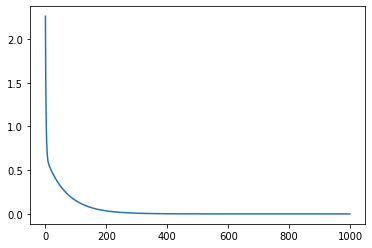

In [88]:
import matplotlib.pyplot as plt
plt.plot(error_list)
plt.show()